### import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### generating dataset

In [2]:
"""
Draw random samples from a multivariate normal distribution.

The multivariate normal, multinormal or Gaussian distribution is a generalization of 
the one-dimensional normal distribution to higher dimensions. Such a distribution is specified 
by its mean and covariance matrix. These parameters are analogous to the mean (average or “center”)
and variance (standard deviation, or “width,” squared) of the one-dimensional normal distribution.

"""

mean_01 = np.array([1,0.5])
cov_01 = np.array([[1.2,0.1],[0.1,1]])
mean_02 = np.array([4,5])
cov_02 = np.array([[0.7,0.1],[0.1,1.3]])

dist_01 = np.random.multivariate_normal(mean_01,cov_01,500)
dist_02 = np.random.multivariate_normal(mean_02,cov_02,500)

### visualising the data

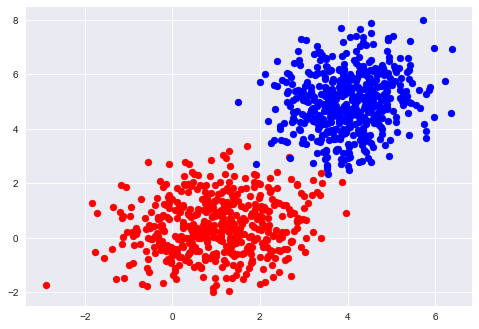

In [3]:
plt.style.use('seaborn')
plt.scatter(dist_01[:,0],dist_01[:,1],color='red')
plt.scatter(dist_02[:,0],dist_02[:,1],color='blue')
plt.show()

In [4]:
from sklearn.model_selection import train_test_split
"""
combine the data of both classes into one array
and shuffle it.
"""
data = np.zeros((1000,3))
data[:500,:2] = dist_01
data[500:,:2] = dist_02
#assigning labels to the two classes.
data[500:,2] = 1
np.random.shuffle(data)

X_train, X_test, y_train, y_test = train_test_split(data[:,:2], data[:,-1], test_size=0.2, random_state=4)


### visualise x_train and x_test data

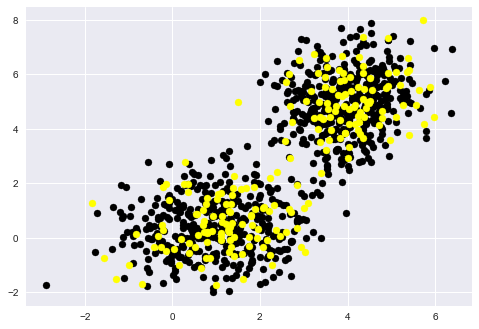

In [5]:
plt.scatter(X_train[:,0],X_train[:,1],color='black')
plt.scatter(X_test[:,0],X_test[:,1],color='yellow')
plt.show()

### normalise the data

In [6]:
x_mean = X_train.mean(axis=0)
x_data = X_train.std(axis=0)
X_train = (X_train-x_mean)/x_data
x_mean1 = X_test.mean(axis=0)
x_data1 = X_test.std(axis=0)
X_test = (X_test-x_mean1)/x_data1

### visualising the sigmoid function

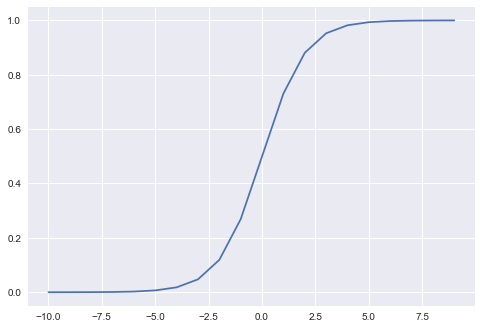

In [8]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

x = np.arange(-10,10)
y = sigmoid(x)
plt.plot(x,y)
plt.show()

### Logistic regression algorithm

In [9]:
def hypothesis(X,theta):
    """
    params:
    
    X-np array (m,n+1)
    theta-> np.array -> (n+1,1)
    
    returns:
    array-> (m,1)
    """
    return sigmoid(np.dot(X,theta))



def error(X,y,theta):
    """
    X-> shape(m,n+1).
    m->number of samples.
    n-> number of features.
    theta -> (n+1,1)
    """
    m = X.shape[0]
    hi = hypothesis(X,theta)
    a1 = np.log(hi)
    a2 = np.log(np.ones((m,1)) - hi)
    loss =  np.mean((y*a1 + (np.ones((m,1)) - y)*a2))
    
    return -1*loss


def gradient(X,y,theta):
    
    """
    params:
    X->(m,n+1)
    y->(m,1)
    theta->(n+1,1)
    
    """
    hi = hypothesis(X,theta)
    grad = -np.dot(X.T,(y-hi))
    m = X.shape[0]
    
    return grad/m

def gradient_descent(X,y,lr=0.01,max_itr=500):
    """
    we give input to this function
    params:->
    X-> (m,n+1)
    m->samples
    n->features
    y->(m,1)
    
    returns:
    theta:-> (n+1,1)
    error:-> list having number of terms = max_itr
    
    
    """
    n = X.shape[1]
    theta = np.zeros((n,1))
    error_list=[]
    for i in range(max_itr):
        
        e = error(X,y,theta)
        error_list.append(e)
        
        grad = gradient(X,y,theta)
        theta = theta - lr*grad
        
    return theta,error_list    

In [10]:

"""
convert X_train array to shape (m,n+1) from (m,n)
by adding x0 = 1 for every sample.
theta = [[theta0] [theta1] [theta2] .......... [theta(n)]],shape->(n+1,1)
"""
m,n = X_train.shape[0],X_train.shape[1]
x_ = np.ones((m,n+1))
x_[:,1:] = X_train
print(x_.shape)
"""
reshape y_train also
"""
y_train = y_train.reshape((800,1))


(800, 3)


### running our logistic regression algo.

In [11]:
t,e = gradient_descent(x_,y_train)
"""
t:->(3,1)
e:->list 
"""


'\nt:->(3,1)\ne:->list \n'

### visualising error function
* we can change lerning rate and max_itr respectively

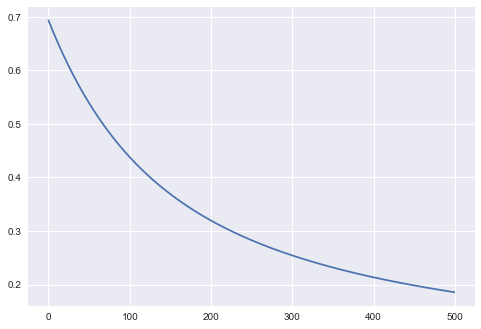

In [12]:
e = np.array(e)
e.shape
plt.plot(e)

### visualising decision boundary

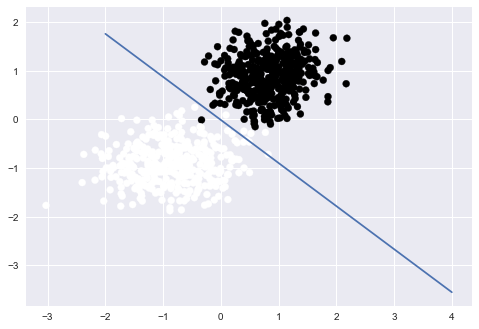

In [13]:
x1 = np.linspace(-2,4,20,endpoint=True)
x2 = (t[0]+t[1]*x1)*(-1/t[2])
plt.plot(x1,x2)
plt.style.use('seaborn')
plt.scatter(X_train[:,0],X_train[:,1],c=y_train)
plt.show()

